# Project Title:

# MOTOR VEHICLE COLLISIONS ON PUBLIC ROADS IN CANADA (1999-2016)

This data set ontains all police-reported motor vehicle collisions on public roads in Canada. Selected variables (data elements) relating to fatal and injury collisions for the collisions from 1999 to the most recent available data.  In the dataset, the fatal accidents are the class of interest and they are only 2% of the total observations resulting in a highly imbalanced binary class problem. Therefore, the overall accurracy is not a good performance measure. We measure the accurracy of the model using the recall and the area under the precision-recall (AUPR) curve.

In [1]:
from IPython.display import Image

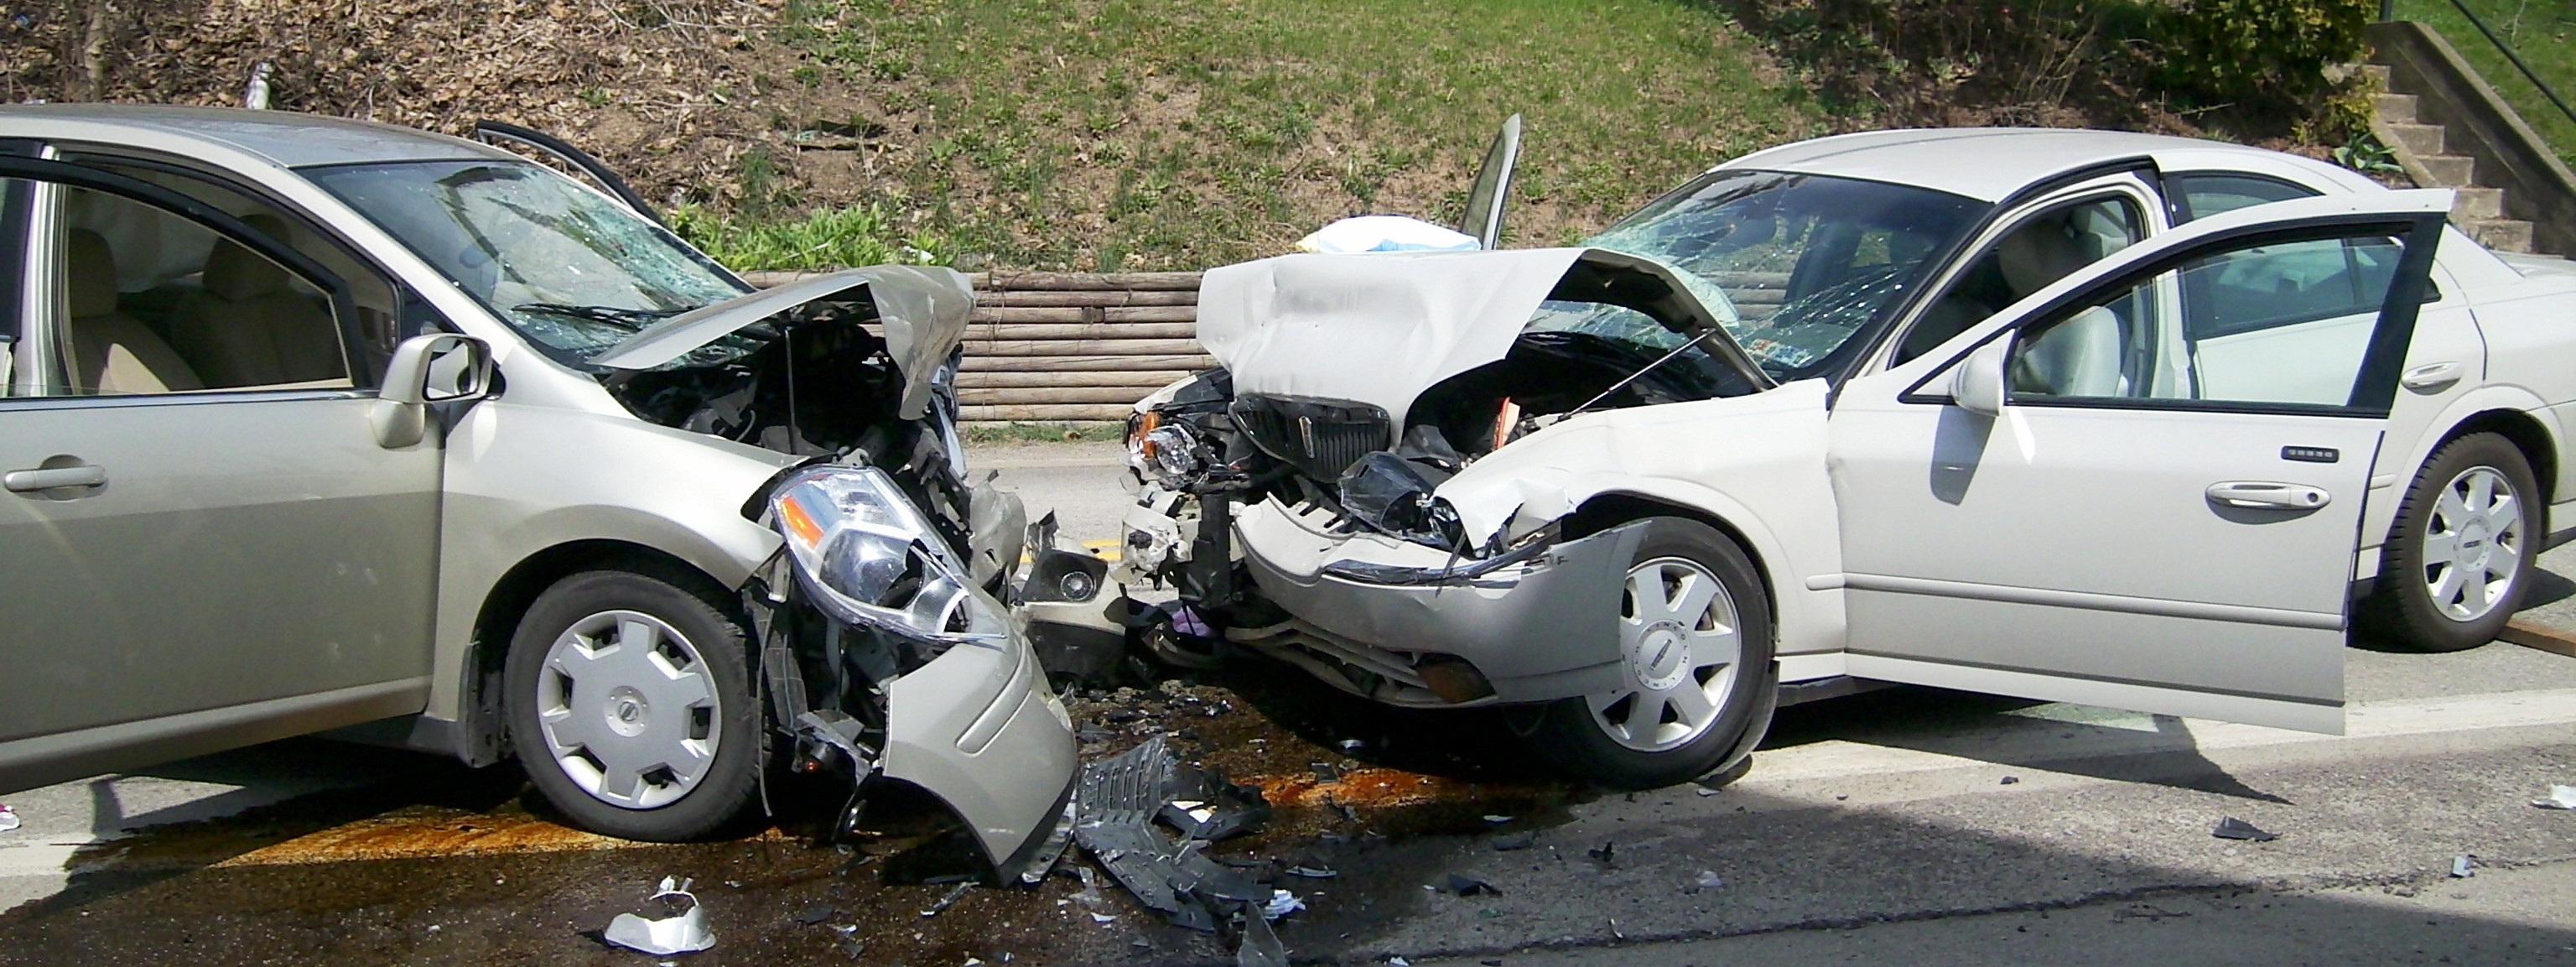

In [2]:
Image("../Data/image.jpg", width=900, height=1000)

# 1. Data Set Information:   [National Collision Database](https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a)

# 2. Attribute Description:

- **C_YEAR**: Year

- **C_MNTH**: Month

- **C_WDAY**: Day of week

- **C_HOUR**: Collision hour

- **C_SEV**: Collision severity (this is the class attribute we are going to predict)

- **C_VEHS**: Number of vehicles involved in collision

- **C_CONF**: Collision configuration

- **C_RCFG**: Road way configuration

- **C_WTHR**: Weather condition

- **C_RSUR**: Surface condition

- **C_RALN**: Road alignment

- **C_TRAF**: Traffic control

- **V_ID**: Vehicle sequence number

- **V_TYPE**: Vehicle type

- **V_YEAR**: Vehicle model year

- **P_ID**: Person sequence number

- **P_SEX**: Person sex

- **P_AGE**: Person age

- **P_PSN**: Person position

- **P_ISEV**: Medical treatment required

- **P_SAFE**: Safety device used

- **P_USER**: Road user class


# 3. Project Objectives

- Understand the causes of fatal accidents on public road in Canada. For example, the vehicle model, age group,  road conditions, etc.

- Build a machine learning model that would predict the type of motor vehicle collision: fatal or non-fatal.


# 4. Practice Skills

In this project, we will learn the following  skills

- Data cleaning

- Exploratory Data Analysis

- Imbalanced learning & Cost sensitive method

- Under Sampling

- Synthetic Minority Over Sampling Technique (SMOTE)

-  Advanced classification models such as random forest classifier and XGBoost

- Precision Recall  (PR) Curve and Area Under the PR Curve (AUPR)

- Receiver Operating Characteristics (ROC) curve and Area Under the ROC (AUROC)

# 5. Imports

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt

# Seaborn for data visualization
import seaborn as sns

# Set font scale and style
sns.set(font_scale = 1.5)
sns.set_style('ticks')
sns.set()

# 6. Load and examine data

In [4]:
df = pd.read_csv('../Data/NCDB_1999_to_2016.csv')
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


In [5]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,753
4,1999,1,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,753


Please note that in each attribute the values with U, UU, UUU, UUUU represent Unknown. X, XX, XXX, XXXX represent Jurisdiction does not provide this data element. Q, QQ, QQQ, QQQQ represent Choice is other than the preceding values.  N, NN, NNN, NNNN represent Data element is not applicable. Please see the explanatory docx file in the Data folder for a full explanation of the attributes and their values.

In [6]:
# Data shape
df.shape

(6486831, 23)

# 7. Data Cleaning

## 7.1 Data types and missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6486831 entries, 0 to 6486830
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.1+ GB


- There are only 3 numerical attributes out of 23 attributes.

The data show no missing values because some of the attributes contain inconsistent formats like U, X, N, and Q as stated above. 

In [8]:
# Replace letters with numpy nan
letter_list = ['U', 'UU', 'UUU', 'UUUU', 'Q', 'QQ', 'QQQ', 'QQQQ', 
               'N', 'NN', 'NNN', 'NNNN', 'X', 'XX', 'XXX', 'XXXX']
df = df.replace(letter_list, np.nan)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6486831 entries, 0 to 6486830
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.1+ GB


In [10]:
# Percentage of missing values
missing_values = (df.isnull().sum()/df.shape[0])*100

# Create a dataframe of missing values
Missing_df =pd.DataFrame({'Variable': missing_values.index, 
                          'Percentage of missing values': missing_values.values})
Missing_df

,Variable,Percentage of missing values
0,C_YEAR,0.000000
1,C_MNTH,0.006213
2,C_WDAY,0.020688
3,C_HOUR,0.989312
4,C_SEV,0.000000
5,C_VEHS,0.008340
6,C_CONF,7.969084
7,C_RCFG,10.757842
8,C_WTHR,1.725110
9,C_RSUR,4.120487


- Indeed, there are lots of missing values in the attributes.

- P_SAFE has the largest percentage of missing values followed by C_RCFG

- There are no missing values in C_YEAR,  C_CASE, and C_SEV (class variable), 

## 7. 2 Convert variables to the correct format

Based on the data information, there are many categorical variables encoded as numbers. We will now convert them  to the correct description to better understand the data

### Day of week

In [11]:
df.C_WDAY.unique()

array([1, 2, 3, 4, 5, 6, 7, '7', nan, '1', '2', '3', '4', '5', '6'],
      dtype=object)

In [12]:
week_dict = {'1': 'Monday','2': 'Tuesday','3':'Wednesday','4':'Thursday',
             '5':'Friday', '6': 'Saturday', '7':'Sunday',1: 'Monday',2: 'Tuesday',3:'Wednesday',
             4:'Thursday',5:'Friday', 6: 'Saturday', 7:'Sunday'} 

In [13]:
df['C_WDAY'] = df['C_WDAY'].replace(week_dict) 

In [14]:
df.C_WDAY.value_counts()

Friday       1105420
Thursday      965804
Saturday      954127
Wednesday     915681
Tuesday       906641
Monday        860631
Sunday        777185
Name: C_WDAY, dtype: int64

### Month of the year

In [15]:
df.C_MNTH.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '12', nan, '01', '02', '11'],
      dtype=object)

In [16]:
month_dict = {1: 'January', '01': 'January', 2: 'February','02': 'February',3: 'March', 4: 'April',
             5:'May', 6: 'June', 7: 'July',8: 'August', 9: 'September',10: 'october', 11: 'November',
              '11': 'November', 12: 'December'}

In [17]:
df['C_MNTH'] = df['C_MNTH'].replace(month_dict)

In [18]:
df.C_MNTH.value_counts()

August       604239
July         595498
June         574991
october      570919
September    567795
January      553805
November     552974
May          518172
February     472648
March        460850
April        433777
12           295427
December     285333
Name: C_MNTH, dtype: int64

- Also the months are encoded as integers  ranging from 1 to 12

### Collision hour

In [19]:
df.C_HOUR.unique()

array(['20', '08', '17', '15', '14', '01', '11', '13', '19', '16', '09',
       '02', '18', '12', '10', '23', '00', '06', '07', '21', nan, '05',
       '22', '03', '04'], dtype=object)

We will convert hour to numeric

In [20]:
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'], errors = 'coerce')

In [21]:
df.C_HOUR.dtypes

dtype('float64')

### Number of vehicles involved in collision

In [22]:
df.C_VEHS.unique()

array(['02', '01', '03', '04', '06', '07', '09', nan, '05', '13', '08',
       '12', '14', '10', '11', '16', 1, 2, 3, 4, 5, 6, 8, 7, 12, 10, '26',
       '71', 19, 25, 9, '21', '27', '15', '35', 15, 13, 26, '22', '41',
       27, 46, 31, 11, '18', 18, 56, '23', 36, 17, 14, 20, 21, '19', 16,
       '29', '25', 77, 28, 38, '38', '17', '32', 35, 22, 33, '54', 72,
       '40', 44, 58, '30', '77', '20', '24', '34', 24, 39, '51', 57, 43,
       37, 47], dtype=object)

The number of vehicles involved in an accident contains inconsistent numbering, e.g '01', '02', and so on. We  will correct this typos and convert the attribute to numeric

In [23]:
df['C_VEHS'] = df['C_VEHS'].replace(['01','02','03','04','05','06','07','08','09'],
                                   [1,2,3,4,5,6,7,8,9])

In [24]:
df['C_VEHS'] = pd.to_numeric(df['C_VEHS'],errors = 'coerce')

In [25]:
df.C_VEHS.dtypes

dtype('float64')

### Collision configuration

In [26]:
df.C_CONF.unique()

array(['34', '01', nan, '04', '31', '21', '23', '03', '02', '33', '24',
       '35', '41', '06', '32', '36', '05', '22', '25'], dtype=object)

In [27]:
coll_dict = {'01': 'Hit a moving object', '02': 'Hit a stationary object', '03': 'Ran off left shoulder',
                 '04': 'Ran off right shoulder', '05': 'Rollover on roadway', '06': 'Any other single-vehicle ',
                 '34': 'Right turn', '31': 'Head-on collision', '21': 'Rear-end collision', 
                  '23': 'left turn conflict', '33': 'Left turn across opposing traffic',
                 '24': 'right turn conflict', '35': 'Right angle collision', '41': 'Hit a parked motor vehicle',
                 '32': 'Approaching side-swipe', 
                  '36': 'Any other two-vehicle - different direction', '22': 'Side swipe', 
                  '25': 'Any other two-vehicle - same direction'}

In [28]:
df['C_CONF'] = df['C_CONF'].replace(coll_dict)

In [29]:
df.C_CONF.value_counts()

Rear-end collision                             1962175
Right angle collision                           954659
Any other single-vehicle                        571376
Any other two-vehicle - different direction     488438
Left turn across opposing traffic               467386
Ran off right shoulder                          235673
Side swipe                                      217779
Head-on collision                               212960
Hit a stationary object                         210740
Ran off left shoulder                           180523
Hit a moving object                              97890
Hit a parked motor vehicle                       89559
left turn conflict                               76476
Right turn                                       65423
right turn conflict                              57676
Approaching side-swipe                           53591
Rollover on roadway                              14732
Any other two-vehicle - same direction           12834
Name: C_CO

### Roadway configuration

In [30]:
df.C_RCFG.unique()

array([nan, '01', '02', '03', '05', '04', '06', '08', '07', '09', '10'],
      dtype=object)

In [31]:
roadway_dict = {'01': 'Non-intersection', '02':'At an intersection', 
                '03': 'Intersection with parking lot entrance', '04': 'Railroad level crossing',
               '05': 'Bridge, overpass, viaduct', '06': 'Tunnel or underpass', '07': 'Passing or climbing lane',
               '08': 'Ramp', '09': 'Traffic circle', '10': 'Express lane of a freeway system'}

In [32]:
df['C_RCFG'] = df['C_RCFG'].replace(roadway_dict)

In [33]:
df.C_RCFG.value_counts()

At an intersection                        3033726
Non-intersection                          2334754
Intersection with parking lot entrance     313894
Bridge, overpass, viaduct                   56748
Railroad level crossing                     25496
Ramp                                        13638
Tunnel or underpass                          6686
Traffic circle                               2338
Passing or climbing lane                     1098
Express lane of a freeway system              610
Name: C_RCFG, dtype: int64

### Weather condition

In [34]:
df.C_WTHR.unique()

array(['1', '5', '3', '4', '7', '2', nan, '6'], dtype=object)

In [35]:
wthr_dict = {'1': 'Clear and sunny', '2': 'Overcast, cloudy but no precipitation', '3': 'Raining',
            '4': 'Snowing', '5': 'Freezing rain, sleet, hail', '6': 'Visibility limitation', '7': 'Strong wind'}

In [36]:
df['C_WTHR'] = df['C_WTHR'].map(wthr_dict)

In [37]:
df.C_WTHR.value_counts()

Clear and sunny                          4529141
Overcast, cloudy but no precipitation     659367
Raining                                   655417
Snowing                                   389135
Visibility limitation                      91556
Freezing rain, sleet, hail                 33474
Strong wind                                16836
Name: C_WTHR, dtype: int64

### Road surface

In [38]:
df.C_RSUR.unique()

array(['5', '3', '2', '4', '1', '6', nan, '7', '9', '8'], dtype=object)

In [39]:
roadsur_dict = {'1':'Dry, normal', '2': 'Wet', '3': 'Snow', '4':'Slush', '5': 'Icy', '6':'Sand/gravel/dirt',
               '7':'Muddy', '8': 'Oil', '9': 'Flooded'}

In [40]:
df['C_RSUR'] = df['C_RSUR'].map(roadsur_dict)

In [41]:
df.C_RSUR.value_counts()

Dry, normal         4279546
Wet                 1183116
Icy                  355200
Snow                 284353
Slush                 81182
Sand/gravel/dirt      27919
Muddy                  6475
Oil                    1331
Flooded                 420
Name: C_RSUR, dtype: int64

### Road alignment

In [42]:
df.C_RALN.unique()

array(['3', '6', '1', nan, '2', '5', '4'], dtype=object)

In [43]:
roadall_dist = {'1':'Straight and level', '2':'Straight with gradient', '3': 'Curved and level',
               '4':'Curved with gradient', '5': 'Top of hill or gradient', '6': 'Bottom of hill or gradient'}

In [44]:
df['C_RALN']= df['C_RALN'].replace(roadall_dist)

In [45]:
df.C_RALN.value_counts()

Straight and level            4632013
Straight with gradient         639160
Curved and level               398313
Curved with gradient           243520
Top of hill or gradient         45064
Bottom of hill or gradient      33050
Name: C_RALN, dtype: int64

### Traffic control

In [46]:
df.C_TRAF.unique()

array(['03', '18', '01', nan, '06', '10', '05', '04', '11', '07', '08',
       '16', '17', '02', '13', '15', '09', '12'], dtype=object)

In [47]:
tracon_dict ={'01': 'Traffic signals fully operational', '02': 'Traffic signals in flashing mode',
             '03': 'Stop sign', '04': 'Yield sign', '05':'Warning sign', '06':'Pedestrian crosswalk',
             '07': 'Police officer', '08': 'School guard, flagman', '09': 'School crossing',
              '10': 'Reduced speed zone', '11': 'No passing zone sign', '12': 'Markings on the road',
             '13': 'School bus stopped with school bus signal lights flashing',
             '15':'Railway crossing with signals, or signals and gates',
             '16': 'Railway crossing with signs only',
             '17': 'Control device not specified', '18': 'No control present'}
df['C_TRAF'] = df['C_TRAF'].map(tracon_dict)

In [48]:
df.C_TRAF.value_counts()

No control present                                           3376540
Traffic signals fully operational                            1813801
Stop sign                                                     721632
Yield sign                                                    100815
Pedestrian crosswalk                                           50596
School guard, flagman                                          26807
Traffic signals in flashing mode                               21230
School bus stopped with school bus signal lights flashing       4714
Warning sign                                                    4432
Control device not specified                                    4383
Railway crossing with signals, or signals and gates             4280
Markings on the road                                            4097
No passing zone sign                                            3657
Reduced speed zone                                              3076
Police officer                    

### Vehicle sequence number

In [49]:
df.V_ID.unique()

array(['01', '02', '99', '03', '04', nan, '05', '06', '07', '08', '09',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', 2, 1, 99, 3, 4, 5, 6, 7,
       8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       '72', '73', '74', '83', '85', '86', '75', '76', '77', 42, 43, 44,
       45, 46, 47, 48, 49, 51, 52, 50, 53, 54, 55, 56, 57], dtype=object)

There is a mismatch in the vehicle sequence number, e.g. '01' is 1, '02' is 2 and so on

In [50]:
df['V_ID'] = df['V_ID'].replace(['01','02','03','04','05','06', '07','08','09'],
                               [1,2,3,4,5,6,7,8,9])

In [51]:
# Convert to numeric
df['V_ID'] = pd.to_numeric(df['V_ID'], errors ='coerce')

### Vehicle type

In [52]:
df.V_TYPE.unique()

array(['06', '01', nan, '11', '20', '17', '07', '08', '09', '22', '14',
       '23', '05', '16', '19', '18', '10', '21'], dtype=object)

In [53]:
vehtype_dict ={'01': 'Light Duty Vehicle', '06': 'Other trucks and vans', '11': 'Urban and Intercity Bus',
              '20': 'Construction equipment', '17': 'Bicycle', '07': 'Unit trucks', '08': 'Road tractor',
              '09': 'School bus', '22': 'Snowmobile', '14': 'Motorcycle and moped', '23': 'Street car',
              '05': 'Panel/cargo van', '16': 'Off road vehicles', 
               '19': 'Farm equipment', '18': 'Purpose-built motorhome',
              '10': 'Smaller school bus', '21': 'Fire engine'}
df['V_TYPE'] = df['V_TYPE'].map(vehtype_dict)

In [54]:
df.V_TYPE.value_counts()

Light Duty Vehicle         5344821
Other trucks and vans       187446
Motorcycle and moped        137563
Bicycle                     136504
Unit trucks                  97033
Road tractor                 77590
Panel/cargo van              72827
Urban and Intercity Bus      57418
School bus                   24084
Off road vehicles            10745
Construction equipment        8387
Snowmobile                    4890
Purpose-built motorhome       3426
Street car                    3373
Farm equipment                2220
Smaller school bus            1057
Fire engine                    904
Name: V_TYPE, dtype: int64

### Vehicle model year

In [55]:
df.V_YEAR.unique()

array(['1990', '1987', '1986', nan, '1984', '1991', '1992', '1997',
       '1993', '1985', '1988', '1994', '1995', '1998', '1989', '1996',
       '1983', '1999', '1965', '1977', '1978', '1968', '1981', '1979',
       '1976', '1972', '2000', '1982', '1975', '1973', '1974', '1980',
       '1967', '1970', '1971', '1962', '1969', '1966', '1945', '1963',
       '1960', '1950', '1964', '1959', '1955', '1958', '1903', '1909',
       '1949', '1923', '1961', '1914', '1908', '1953', '1906', '1939',
       '1925', '1948', '1938', '1907', '1952', '1904', '1917', '1912',
       '1944', '1956', '1930', '1931', '1951', '1946', '1947', '1957',
       '1954', '1943', '1901', '1937', '1905', '1935', '1926', '1941',
       '1932', '1920', '1933', '1919', '1915', '1929', '1928', '2001',
       '1913', '1940', '1927', '2002', '1916', '1942', '1918', '2003',
       '1924', '1922', '1934', '2004', '2005', '2006', '2007', '2008',
       '1911', '2009', '2010', '2011', '1936', '2012', '1910', '1921',
       '2

In [56]:
# Convert to numeric
df['V_YEAR'] = pd.to_numeric(df['V_YEAR'], errors = 'coerce')

In [57]:
df['V_YEAR'].value_counts().head()

2000.0    336784
2002.0    315643
2003.0    307533
1998.0    303402
1999.0    296906
Name: V_YEAR, dtype: int64

### Person sequence ID

In [58]:
df.P_ID.unique()

array(['01', '02', '03', '04', '05', '06', nan, '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '99'], dtype=object)

In [59]:
df['P_ID'] = df['P_ID'].replace(['01', '02','03','04','05','06','07','08','09'],
                               [1,2,3,4,5,6,7,8,9])

In [60]:
df['P_ID'] = pd.to_numeric(df['P_ID'], errors = 'coerce')

In [61]:
df.P_ID.dtypes

dtype('float64')

### Gender

In [62]:
df.P_SEX.unique()

array(['M', 'F', nan], dtype=object)

In [63]:
df.P_SEX.value_counts()

M    3490068
F    2707015
Name: P_SEX, dtype: int64

- More males are involved in vehicle collision than females

### Person age

In [64]:
df.P_AGE.unique()

array(['41', '19', '20', '46', '05', '28', '21', nan, '61', '56', '34',
       '22', '30', '49', '32', '31', '68', '08', '45', '17', '33', '82',
       '39', '37', '55', '38', '43', '35', '23', '25', '65', '44', '36',
       '70', '50', '40', '27', '26', '15', '53', '16', '13', '14', '12',
       '18', '77', '86', '42', '24', '47', '62', '06', '57', '83', '74',
       '67', '51', '29', '01', '02', '54', '71', '10', '79', '63', '58',
       '48', '60', '07', '64', '75', '52', '85', '93', '92', '69', '72',
       '11', '59', '09', '66', '76', '73', '04', '78', '80', '84', '03',
       '81', '89', '87', '88', '90', '91', '95', '97', '94', '99', '98',
       '96'], dtype=object)

In [65]:
df['P_AGE'] = df['P_AGE'].replace(['01','02','03','04', '05', '06','07','08','09'],
                                 [1,2,3,4,5,6,7,8,9])

In [66]:
df['P_AGE'] = pd.to_numeric(df['P_AGE'], errors = 'coerce')

In [67]:
df.P_AGE.dtypes

dtype('float64')

### Person position

In [68]:
df.P_PSN.unique()

array(['11', '13', '99', '23', '98', '21', '22', '12', nan, '96', '32',
       '31', '33', '97'], dtype=object)

In [69]:
perpos_dict = {'11': 'Driver', '13': 'Front row, right outboard',
               '99': 'Pedestrian', '23': 'Second row, right outboard',
              '98': 'Outside passenger compartment', '21': 'Second row, left outboard',
              '22': 'Second row, center', '12': 'Front row, center', '96': 'Position unknown',
              '32': 'Third row, center', '31': 'Third row, left outboard',
              '33': 'Third row, right outboard', '97': 'Sitting on someone’s lap'}

df['P_PSN'] = df['P_PSN'].map(perpos_dict)

In [70]:
df.P_PSN.value_counts()

Driver                           4346086
Front row, right outboard         965488
Second row, right outboard        283557
Second row, left outboard         237432
Pedestrian                        233141
Second row, center                 97167
Front row, center                  94171
Position unknown                   49937
Third row, center                  32422
Outside passenger compartment       7203
Third row, right outboard           6626
Third row, left outboard            5221
Sitting on someone’s lap             281
Name: P_PSN, dtype: int64

### Medical treatment required

In [71]:
df.P_ISEV.unique()

array(['1', '2', '3', nan], dtype=object)

In [72]:
med_dict = {'1': 'No Injury', '2': 'Injury', '3': 'Fatality'}
df['P_ISEV'] = df['P_ISEV'].map(med_dict)

In [73]:
df.P_ISEV.value_counts()

Injury       3399066
No Injury    2626177
Fatality       44167
Name: P_ISEV, dtype: int64

### Safety device used

In [74]:
df.P_SAFE.unique()

array([nan, '02', '01', '13', '12', '09', '10', '11'], dtype=object)

In [75]:
safe_dict = {'02': 'Safety device used', '01': 'No safety device used', '13': 'No safety device equipped',
            '12': 'Other safety device used', '09': 'Helmet worn', '10': 'Reflective clothing worn',
            '11': 'Both helmet and reflective clothing used'}
df['P_SAFE'] = df['P_SAFE'].map(safe_dict)

In [76]:
df.P_SAFE.value_counts()

Safety device used                          4604758
No safety device used                        214470
No safety device equipped                    156196
Helmet worn                                  113051
Other safety device used                      26188
Reflective clothing worn                        188
Both helmet and reflective clothing used         14
Name: P_SAFE, dtype: int64

### Road user class

In [77]:
df.P_USER.unique()

array(['1', '2', '3', nan, '4', '5'], dtype=object)

In [78]:
roaduser_dict = {'1': 'Motor Vehicle Driver', '2': 'Motor Vehicle Passenger', '3': 'Pedestrian',
                '4': 'Bicyclist', '5': 'Motorcyclist'}
df['P_USER'] = df['P_USER'].map(roaduser_dict)

In [79]:
df.P_USER.value_counts()

Motor Vehicle Driver       4048891
Motor Vehicle Passenger    1706890
Pedestrian                  246868
Motorcyclist                137563
Bicyclist                   136504
Name: P_USER, dtype: int64

### Class Distribution

Eventually, we plan to build a predictive model that would predict the fatality rate of vehicle collision. So we need totake a look at the distribution of the
class variable

In [80]:
df.C_SEV.unique()

array([2, 1])

In [81]:
df.C_SEV.value_counts()

2    6378831
1     108000
Name: C_SEV, dtype: int64

 The class is encoded as integers 1 and 2, where 1 represents fatal accidents and 2 represents non-fatal accidents. It is useful to recode the class variable as a binary class, where we replace 2 with 0.

In [82]:
df['C_SEV']= df['C_SEV'].replace(2, 0) 
df['C_SEV'].value_counts()

0    6378831
1     108000
Name: C_SEV, dtype: int64

Text(0, 0.5, 'Count')

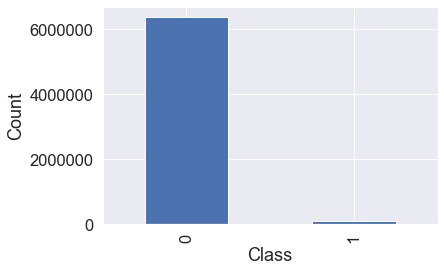

In [83]:
# Set figure font
sns.set(font_scale = 1.5)

# Plot bar
df['C_SEV'].value_counts().plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Count')

 Let's look at the percentage of the class distribution

In [84]:
(df['C_SEV'].value_counts()/df.shape[0])*100 

0    98.335088
1     1.664912
Name: C_SEV, dtype: float64

- This is an extremely imbalanced class problem, where the class of interest (in this case fatal accidents) is extremely small compared to the other class 

- The majority (negative) class contains 98% of the class distribution, whereas the minority (positive) class is only 2% of the class distribution. 

### Statistical description of numerical values

In [85]:
df.describe()

,C_YEAR,C_HOUR,C_SEV,C_VEHS,V_ID,V_YEAR,P_ID,P_AGE,C_CASE
count,6.486831e+06,6.422656e+06,6.486831e+06,6.486290e+06,6.486375e+06,5.844989e+06,6.469219e+06,6.046016e+06,6.486831e+06
mean,2.006916e+03,1.370001e+01,1.664912e-02,2.048003e+00,5.257550e+00,1.999411e+03,1.456958e+00,3.663199e+01,1.218900e+06
std,5.172003e+00,5.175633e+00,1.279528e-01,1.254962e+00,1.866723e+01,7.509725e+00,1.217304e+00,1.846710e+01,7.103469e+05
min,1.999000e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.901000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.002000e+03,1.000000e+01,0.000000e+00,2.000000e+00,1.000000e+00,1.994000e+03,1.000000e+00,2.200000e+01,5.984120e+05
50%,2.007000e+03,1.400000e+01,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,3.400000e+01,1.214689e+06
75%,2.011000e+03,1.700000e+01,0.000000e+00,2.000000e+00,2.000000e+00,2.005000e+03,2.000000e+00,4.900000e+01,1.831991e+06
max,2.016000e+03,2.300000e+01,1.000000e+00,7.700000e+01,9.900000e+01,2.016000e+03,9.900000e+01,9.900000e+01,2.455739e+06


- The mean fatality is approximately 2%, so accuracy is not a good metric for this problem

- The mean age of person involved in fatal accident is less than  37 years old 

# 8. Exploratory Data Analysis

## 8.1 Which year does the most collision occur and which gender was  mostly involved?

We will look at the fatality rate by year of occurrence and gender

In [86]:
table_year = df.pivot_table('C_SEV', index = 'C_YEAR', columns = 'P_SEX', aggfunc = 'sum')
table_year.sort_values(by = ['C_YEAR']).head()

P_SEX,F,M
C_YEAR,,
1999,2440,4930
2000,2127,4776
2001,2077,4522
2002,2251,4790
2003,2194,4554


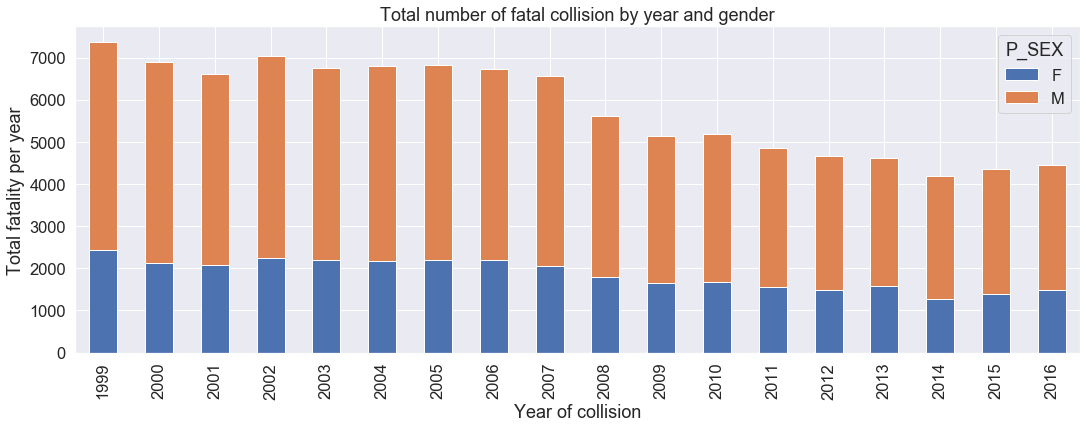

In [87]:
# Plot size
fig, ax = plt.subplots(figsize = (18,6))
sns.set(font_scale = 1.5)

# Plot figure
table_year.plot(kind = 'bar', ax=ax, stacked = True)
plt.xlabel('Year of collision')
plt.ylabel('Total fatality per year')
plt.legend(title = 'P_SEX')
plt.title('Total number of fatal collision by year and gender')
plt.savefig('fig1.png')

 We can see that
 
- most vehicle collisions occur mostly in the year 1999.

- the least vehicle collision occured in the year 2014

- more males got involved in a vehicle collision than females

## 8. 2 Which age and gender had the most fatal collision?

We now will look at the fatality rate by age and gender

In [88]:
pivot_tab_age =df.pivot_table('C_SEV', index = 'P_AGE', columns = 'P_SEX', aggfunc = 'sum')
pivot_tab_age.head()

P_SEX,F,M
P_AGE,,
1.0,279,283
2.0,171,176
3.0,153,185
4.0,182,203
5.0,174,236


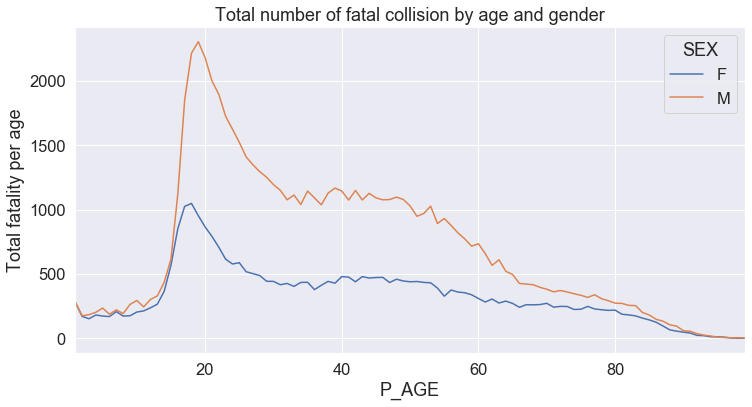

In [89]:
# Set figure size
fig, ax = plt.subplots(figsize = (12,6))
sns.set(font_scale = 1.5)

# Plot figure
pivot_tab_age.plot(ax=ax)
plt.xlabel('P_AGE')
plt.ylabel('Total fatality per age')
plt.legend(title = 'SEX')
plt.title('Total number of fatal collision by age and gender')
plt.savefig('fig2.png')

- The plot shows that teenagers at 18 years old (mostly males) involve in most fatal collisions
- The total number of fatal accidents fluctuates slightly between age 22 to 80
- Majority of people (males and females) involved in any sort of collision are  within 19 and 20 years old.

## 8. 3 What is the proportion of fatality by gender?

### Count of fatality by gender

In [90]:
table = pd.crosstab(df['C_SEV'], df['P_SEX'])
table

P_SEX,F,M
C_SEV,,
0,2673420,3418992
1,33595,71076


### Proportion of fatality by gender

In [91]:
group_SEX = df.groupby('P_SEX')['C_SEV'].mean()
group_SEX

P_SEX
F    0.012410
M    0.020365
Name: C_SEV, dtype: float64

In [92]:
# # Set figure size
# fig, ax = plt.subplots(1,2,figsize = (18,6))
# sns.set(font_scale = 1.5)

# # Plot figures
# group_SEX.plot(kind = 'bar', ax = ax[0])
# sns.violinplot(data = df.dropna(), x = 'P_SEX', y = 'P_AGE', hue = 'C_SEV', split =True,size = 6, 
#                palette = 'Set3', ax= ax[1])

# ax[0].set_xlabel('P_SEX')
# ax[0].set_ylabel('Fatality Rate')
# ax[1].set_xlabel('P_SEX')
# ax[1].set_ylabel('P_AGE')
# ax[1].legend(title = 'Fatality')

- We can see that almost 1 in 100 females are involved in fatal accidents, whereas 2 in 100 males are involved in fatal accidents

- As we already know from the previous plots that the fatality rate is high for males than females.

- The age vs. sex plot suggests more investigation (see below).

## 8. 4 What is the age distribution among fatal collision?

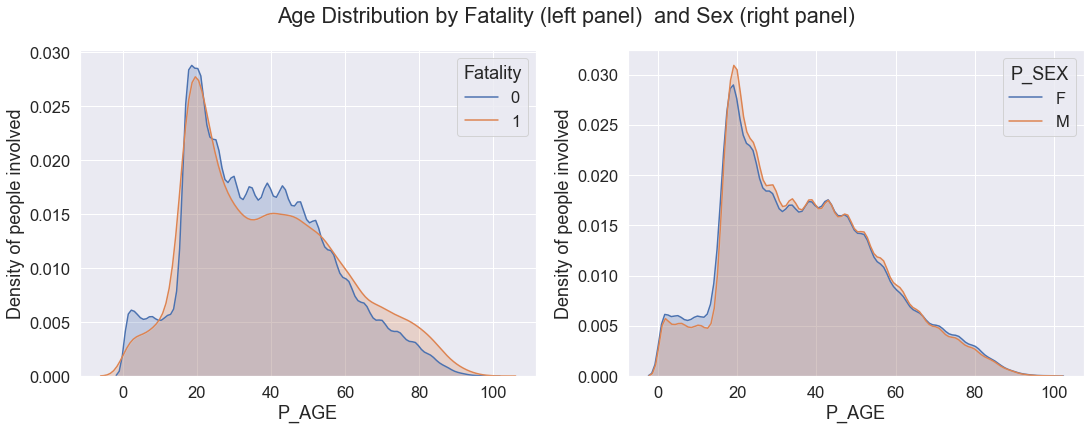

In [93]:
# Set figure size and subplots
fig = plt.figure(figsize = (18,6))
sns.set(font_scale = 1.5)

ax = fig.add_subplot(1,2,1)
ax.set_xlabel('P_AGE')
ax.set_ylabel('Density of people involved')

ax1 = fig.add_subplot(1,2,2)
ax1.set_xlabel('P_AGE')
ax1.set_ylabel('Density of people involved')

# Plot figures
g = sns.FacetGrid(data = df.dropna(), hue = 'C_SEV')
g.map(sns.kdeplot, 'P_AGE', shade = True, ax = ax)
ax.legend(title = 'Fatality')
plt.close(2)

g1 = sns.FacetGrid(data = df.dropna(), hue = 'P_SEX')
g1.map(sns.kdeplot, 'P_AGE', shade = True, ax = ax1)
ax1.legend(title = 'P_SEX')
plt.close(2)
title = fig.suptitle('Age Distribution by Fatality (left panel)  and Sex (right panel)',
                     ha ='center') 
plt.savefig('fig3.png')

Left panel plot:

- More yonger children ( between age 0 to 15 ) are involved in non-fatal collisions, probably because they do not have a driver's licence yet.

- However, more teenagers ( between age 16 to 19 )  are involved in fatal collisions and they are mostly boys.

- More middle age adults are involved in non-fatal collisions, but more old people are involved in fatal collisions

- Majority of people (males and females) involved in any sort of collision are  within 19 and 20 years old.

Right panel plot:

- The yonger children between age 0 to 15 are mostly females

- There are more female drivers between age 16 to 19, but more males are involved in fatal accidents

- Majority of people (males and females) involved in any sort of collision are  within 19 and 20 years old, but they are mostly males

## 8.5 Which vehicle model year were involved in most fatal collisions?

In [94]:
pivot_tab_v_year =df.pivot_table('C_SEV', index = 'V_YEAR', columns = 'P_SEX', aggfunc = 'sum')
pivot_tab_v_year.tail()

P_SEX,F,M
V_YEAR,,
2012.0,375.0,756.0
2013.0,266.0,528.0
2014.0,230.0,457.0
2015.0,144.0,324.0
2016.0,84.0,174.0


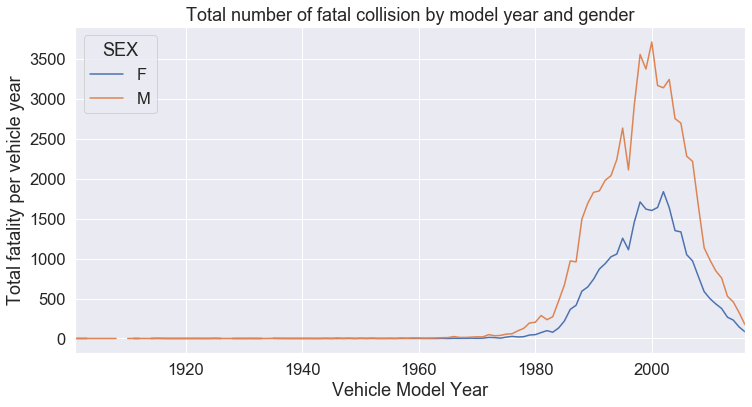

In [95]:
# Set figure size
fig, ax = plt.subplots(figsize = (12,6))
sns.set(font_scale = 1.5)

# Plot figure
pivot_tab_v_year.plot(ax=ax)
plt.xlabel('Vehicle Model Year')
plt.ylabel('Total fatality per vehicle year')
plt.legend(title = 'SEX')
plt.title('Total number of fatal collision by model year and gender')
plt.savefig('fig4.png')

- The vehicle models in the year 2000 & 2001  caused the most fatal collisions and they were driven mostly by males

## 8. 6 What is the distribution of vehicle model year by gender

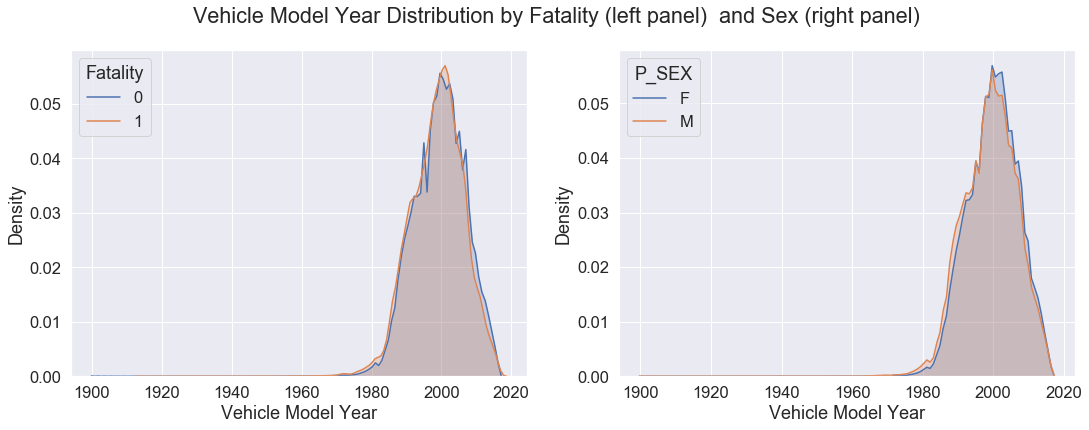

In [96]:
# Set figure size and subplots
fig = plt.figure(figsize = (18,6))
sns.set(font_scale = 1.5)

ax = fig.add_subplot(1,2,1)
ax.set_xlabel('Vehicle Model Year')
ax.set_ylabel('Density')

ax1 = fig.add_subplot(1,2,2)
ax1.set_xlabel('Vehicle Model Year')
ax1.set_ylabel('Density')

# Plot figures
g = sns.FacetGrid(data = df.dropna(), hue = 'C_SEV')
g.map(sns.kdeplot, 'V_YEAR', shade = True, ax = ax)
ax.legend(title = 'Fatality')
plt.close(2)

g1 = sns.FacetGrid(data = df.dropna(), hue = 'P_SEX')
g1.map(sns.kdeplot, 'V_YEAR', shade = True, ax = ax1)
ax1.legend(title = 'P_SEX')
plt.close(2)
title = fig.suptitle('Vehicle Model Year Distribution by Fatality (left panel)  and Sex (right panel)',
                     ha ='center')    
plt.savefig('fig5.png')

Left panel plot:

- More vehicle model from 1975 up to about 1990 caused fatal collisions, but the vehicle model in the year 2000 caused the most fatal collision. 

- The new vehicle models from 2005 to present seem to be involved in mostly non-fatal collisions.

Right panel plot:

- The vehicle model from 1975 up to about 1990 are mostly driven by males

- The vehicle year 2000 are mostly owned by females but more males are involved in fatal collisions as we saw in the previous plot

## 8.7 What is the fatality rate per day?

In [97]:
table_day = df.pivot_table('C_SEV', index = 'C_WDAY', columns = 'P_SEX', aggfunc = 'sum')
table_day

P_SEX,F,M
C_WDAY,,
Friday,5664,11925
Monday,4075,8626
Saturday,6014,12724
Sunday,5627,10831
Thursday,4409,9812
Tuesday,3893,8478
Wednesday,3912,8670


Text(0.5, 1.0, 'Total number of fatal collision by day and gender')

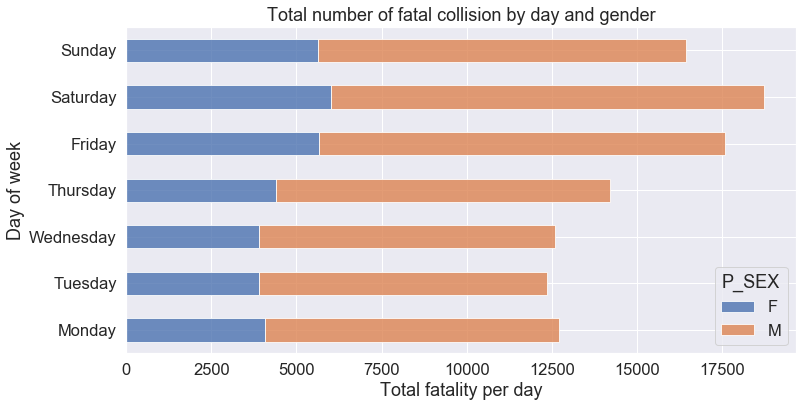

In [98]:
# Set figure size
fig, ax = plt.subplots(figsize = (12,6))
sns.set(font_scale = 1.5)

# Plot figure
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
table_day.loc[order].plot(kind = 'barh', stacked = True,ax = ax, alpha =0.8)
plt.xlabel('Total fatality per day')
plt.ylabel('Day of week')
plt.legend(title = 'P_SEX')
plt.title('Total number of fatal collision by day and gender')

- Most fatal accidents occur on Saturdays followed by Fridays

## 8. 8 What is the fatality rate per month?

In [99]:
table_month = df.pivot_table('C_SEV', index = 'C_MNTH', columns = 'P_SEX', aggfunc = 'sum')
table_month

P_SEX,F,M
C_MNTH,,
12,1667,3188
April,2042,4624
August,3551,7401
December,1545,2999
February,2163,4526
January,2684,5323
July,3622,7335
June,2832,6295
March,2286,4561


Text(0.5, 1.0, 'Total number of fatal collision by month and gender')

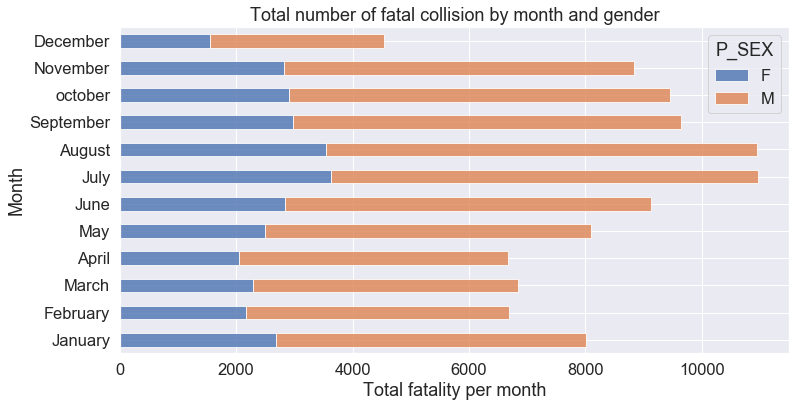

In [100]:
# Set figure size
fig, ax = plt.subplots(figsize = (12,6))
sns.set(font_scale = 1.5)

order =['January','February','March', 'April','May', 'June',  
    'July','August','September', 'october','November','December']
        
# Plot figure
table_month.loc[order].plot(kind = 'barh', stacked = True, ax = ax, alpha =0.8)
plt.ylabel('Month')
plt.xlabel('Total fatality per month')
plt.legend(title = 'P_SEX')
plt.title('Total number of fatal collision by month and gender')

- Most fatal accidents occur in July and August, that is during the summer weather

## 8. 9 Which weather condition caused most fatal accidents?

In [101]:
table_weather = df.pivot_table('C_SEV', index = 'C_WTHR', columns = 'P_SEX', aggfunc = 'sum')
table_weather

P_SEX,F,M
C_WTHR,,
Clear and sunny,22086,47326
"Freezing rain, sleet, hail",282,540
"Overcast, cloudy but no precipitation",4186,8856
Raining,2914,5923
Snowing,2515,4749
Strong wind,208,379
Visibility limitation,1052,2512


Text(0.5, 1.0, 'Total number of fatal collision by weather and gender')

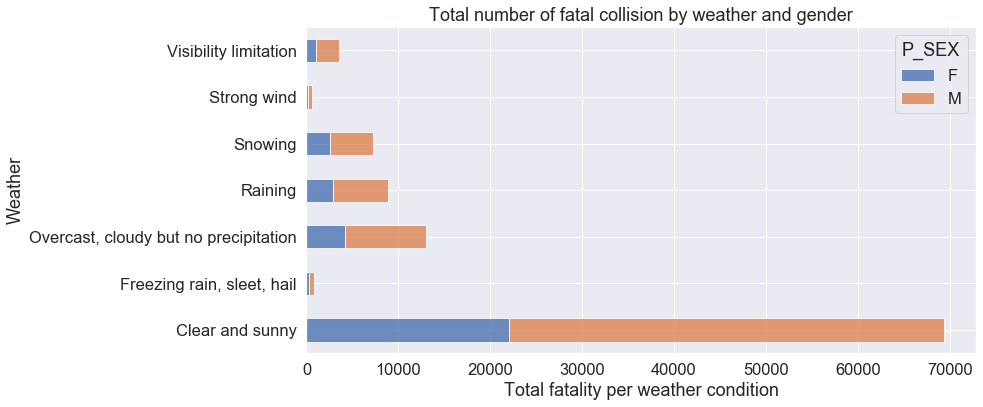

In [102]:
# Set figure size
fig, ax = plt.subplots(figsize = (12,6))
sns.set(font_scale = 1.5)

# Plot figure
table_weather.plot(kind = 'barh', stacked = True,ax = ax, alpha =0.8)
plt.ylabel('Weather')
plt.xlabel('Total fatality per weather condition')
plt.legend(title = 'P_SEX')
plt.title('Total number of fatal collision by weather and gender')

- The fatal collisions occur mostly when the roads are clear and sunny, which is mainly during the summer

## 8.10 What road configuration caused the most fatal collisions?

In [103]:
table_road = df.pivot_table('C_SEV', index = 'C_RCFG', columns = 'P_SEX', aggfunc = 'sum')
table_road

P_SEX,F,M
C_RCFG,,
At an intersection,9970,18538
"Bridge, overpass, viaduct",339,913
Express lane of a freeway system,6,15
Intersection with parking lot entrance,919,1903
Non-intersection,19250,42446
Passing or climbing lane,39,66
Railroad level crossing,202,660
Ramp,22,65
Traffic circle,6,5


Text(0.5, 1.0, 'Total number of fatal collision by road configuration and gender')

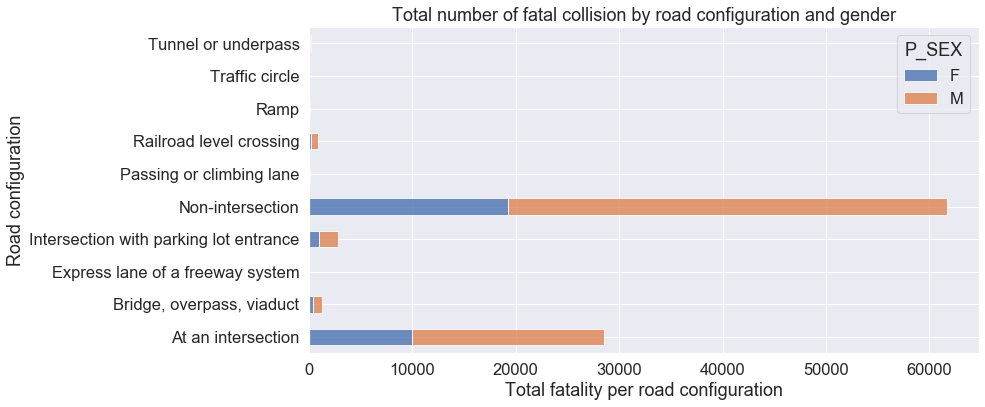

In [104]:
# Set figure size
fig, ax = plt.subplots(figsize = (12,6))
sns.set(font_scale = 1.5)

# Plot figure
table_road.plot(kind = 'barh', stacked = True,ax = ax, alpha =0.8)
plt.ylabel('Road configuration')
plt.xlabel('Total fatality per road configuration')
plt.legend(title = 'P_SEX')
plt.title('Total number of fatal collision by road configuration and gender')

- Most fatal accidents occur at no intersection

## 9. Boxplot 

Text(0.5, 0, 'FATALITY')

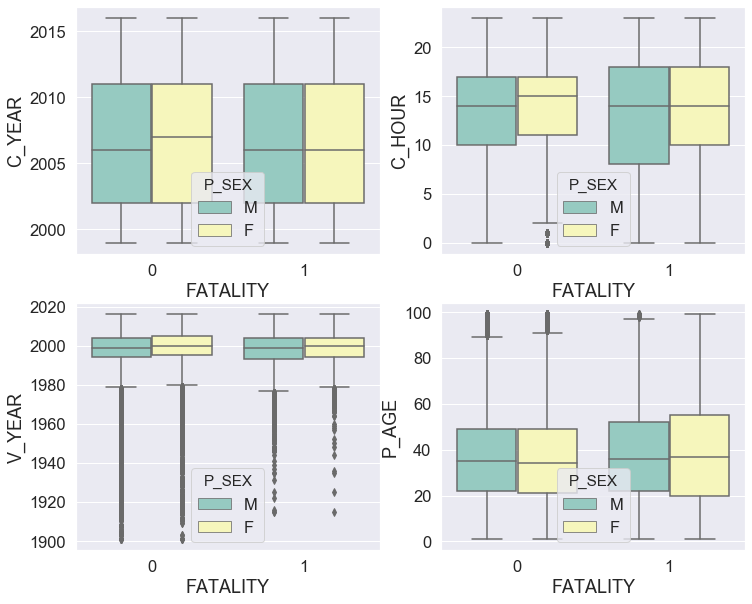

In [105]:
# Set figure size and subplots
fig, ax = plt.subplots(2,2, figsize=(12,10))
sns.set(font_scale = 1.5)

# Make box plots
sns.boxplot(data = df, x='C_SEV', y= 'C_YEAR', hue = 'P_SEX', palette = 'Set3', ax = ax[0,0])
ax[0,0].set_xlabel('FATALITY')
sns.boxplot(data = df, x='C_SEV', y= 'C_HOUR',  hue = 'P_SEX', palette = 'Set3',ax = ax[0,1])
ax[0,1].set_xlabel('FATALITY')
sns.boxplot(data = df, x='C_SEV', y= 'V_YEAR', hue = 'P_SEX',  palette = 'Set3',ax = ax[1,0])
ax[1,0].set_xlabel('FATALITY')
sns.boxplot(data = df, x='C_SEV', y= 'P_AGE',  hue = 'P_SEX', palette = 'Set3',ax = ax[1,1])
ax[1,1].set_xlabel('FATALITY')

- The boxplot shows no extreme outliers in the numerical variables

# 9.  Data Pre-processing

In [99]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [100]:
# from numbers import Number
# from scipy import stats

In [101]:
# var_list = ['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_VEHS','C_CONF','C_RCFG','C_WTHR','C_RSUR','C_RALN','C_TRAF',
# 'V_ID','V_TYPE','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER']
 
# CHI2 = []
# P =[]
# Variable =[]

# for k in var_list:
#     table = pd.crosstab(df['C_SEV'], df[k])
#     chi2, p, dof, expected = stats.chi2_contingency(table.values)
#     Variable.append(k)
#     CHI2.append(chi2)
#     P.append(p)
    
# pd.DataFrame({'Variable': Variable, 'Chi-Square':CHI2, 'P-Value':P })

## 9. 1 Delete columns with missing values

Since the data is very large and we don't plan to use of it, we will delete all columns with missing values

In [102]:
df = df.dropna()

In [103]:
df.shape

(3490900, 23)

- We still have a substantial amount of data after delecting the columns with missing values

## 9. 2  Separate the predictors  from the target variable

 We create a feature matrix consisting of the predictors and a target variable which is the class to be predicted. We also drop features such as V_ID and P_ID as they are not useful in predicting the target variable

In [104]:
# Feature matrix
X = df.drop(['P_ID', 'V_ID', 'C_SEV'], axis = 1)

In [105]:
# Target variable
y = df['C_SEV']

In [106]:
X.shape

(3490900, 20)

In [107]:
y.shape

(3490900,)

##  9.3 Split the data set into training and test sets

In [108]:
from sklearn.model_selection import train_test_split

Since the dataset is very large to fit in a small laptop memory, training the entire dataset on a laptop will take days to run let alone tuning the hyperparameters by grid search.  Hence, we will first split the dataset into subsets and train the model on the small subset

In [130]:
X1, X2, y1, y2 = train_test_split(X,y, test_size = 0.01, random_state = 42, stratify = y)

We will perform the machine learning on the smaller subset

In [131]:
X2.shape

(34909, 20)

In [132]:
y2.shape

(34909,)

We now split the small subsets ( X2 and y2 ) into $80\%$ training set and $20\%$ test set in a stratify fashion

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size = 0.2, random_state = 42, stratify = y2)

In [134]:
print('Training set size:', X_train.shape)
print('Class training set size:', y_train.shape)
print('*************************************')
print('Test set size:', X_test.shape)
print('Class test set size:', y_test.shape)

Training set size: (27927, 20)
Class training set size: (27927,)
*************************************
Test set size: (6982, 20)
Class test set size: (6982,)


In [135]:
print('Training set class distribution:\n', (y_train.value_counts()/X_train.shape[0])*100)
print('*********************************')
print('Test set class distribution:\n', (y_test.value_counts()/X_test.shape[0])*100)

Training set class distribution:
 0    98.388656
1     1.611344
Name: C_SEV, dtype: float64
*********************************
Test set class distribution:
 0    98.395875
1     1.604125
Name: C_SEV, dtype: float64


We can see that we still have the same class distribution as the original dataset

## 9.4 Feature scaling and handling categorical attributes

We will now standardize the numerical variables and binarize the categorical variables using the DataFrameMapper

In [136]:
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

In [137]:
# List of categorical attributes
cat_subset = list(X_train.select_dtypes('O'))

# List of numerical attributes
num_subset = list(X_train.select_dtypes('number'))

# Binarize the categorical attributes
cat_attribs = [([cat], LabelBinarizer()) for cat in cat_subset]

# Standardize the numerical attributes
num_attribs = [([num], StandardScaler()) for num in num_subset]

# Build a dataframe mapper pipeline
mapper = DataFrameMapper(cat_attribs + num_attribs)

# Fit transform the training set
X_train_scale = mapper.fit_transform(X_train)

# Only transform the training set
X_test_scale = mapper.transform(X_test)

In [138]:
# Size of the data after pre-processing
print('Training set size after pre-processing:', X_train_scale.shape)
print('Test set size after pre-processing:', X_test_scale.shape)

Training set size after pre-processing: (27927, 130)
Test set size after pre-processing: (6982, 130)


Let's convert the class labels to arrays

In [139]:
y_train = y_train.values

In [140]:
y_test = y_test.values

#  Predictive Modeling ( Machine Learning )

## 1. Import models and metrics

In [141]:
# Machine learning models
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model performance metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc,recall_score
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score, precision_recall_curve

## 2. Model selection cross-validation function

In [142]:
# Model selection by cross-validation
def model_selection_cv(model, n_training_samples, n_training_labels, cv_fold, scoring = None):
    
        # Fit the training set
        model.fit(n_training_samples, n_training_labels)
        
        # Compute accuracy on 10-fold cross validation
        score = cross_val_score(model, n_training_samples, n_training_labels, 
                                cv = cv_fold, scoring = scoring)

        # Make prediction on 10-fold cross validation
        y_val_pred = cross_val_predict(model, n_training_samples, n_training_labels, cv = cv_fold)

        # Make probability prediction on 10-fold cross validation
        y_pred_proba = cross_val_predict(model,n_training_samples, n_training_labels, 
                                         cv = cv_fold, method = 'predict_proba')[:,1]

        # Print results
        print('****************************************************************************')
        print('CV score: %f (%f)'%(score.mean(), score.std()))
        print('AUROC: %f'%(roc_auc_score(n_training_labels, y_pred_proba)))
        print('AUPRC: %f'%(average_precision_score(n_training_labels, y_pred_proba)))
        print('Predicted classes:', np.unique(y_val_pred))
        print('Confusion matrix:\n', confusion_matrix(n_training_labels, y_val_pred))
        print('Classification report:\n', classification_report(n_training_labels, y_val_pred))
        print('****************************************************************************')

## 3. Test prediction function

In [143]:
# Model prediction on the test set
def Test_Prediction(model, n_training_samples, n_training_labels, n_test_samples, n_test_labels):
   
        # Fit the training set
        model.fit(n_training_samples, n_training_labels)

        # Make prediction on the test set
        y_predict = model.predict(n_test_samples)

        # Compute the accuracy of the model
        accuracy = accuracy_score(n_test_labels, y_predict)

        # Predict probability
        y_predict_proba = model.predict_proba(n_test_samples)[:,1]
        
        print('****************************************************************************')
        print('Test accuracy:  %f'%(accuracy))
        print('AUROC: %f'%(roc_auc_score(n_test_labels, y_predict_proba)))
        print('AUPRC: %f'%(average_precision_score(n_test_labels, y_predict_proba)))
        print('Predicted classes:', np.unique(y_predict))
        print('Confusion matrix:\n', confusion_matrix(n_test_labels, y_predict))
        print('Classification report:\n', classification_report(n_test_labels, y_predict))
        print('****************************************************************************')

## 4. ROC and PR curves function for the cross-validation training set

In [144]:
# ROC and PR Curves for the Cross-Validation Training Set
def Plot_ROC_Curve_and_PRC_Cross_Val(model, n_training_samples, n_training_labels, color= None, label =None):
                                                
    model.fit(n_training_samples, n_training_labels)

    y_pred_proba = cross_val_predict(model, n_training_samples, n_training_labels, cv =5,
                                     method = "predict_proba")

    # Compute the fpr and tpr for each classifier
    fpr, tpr, thresholds = roc_curve(n_training_labels, y_pred_proba[:,1])
    
    # Compute the precisions and recalls for the classifier
    precisions, recalls, thresholds = precision_recall_curve(n_training_labels, y_pred_proba[:,1])
    
    # Compute the area under the ROC curve for each classifier
    area_auc =roc_auc_score(n_training_labels, y_pred_proba[:,1])
    
    # Compute the area under the PR curve for the classifier
    area_prc = auc(recalls, precisions)
    
    # ROC Curve
    plt.subplot(121)
    plt.plot(fpr, tpr, color = color, label = (label) %area_auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title('ROC Curve for the Cross-Validation Training Set')
    plt.legend(loc = 'best')
    
    # PR Curve
    plt.subplot(122)
    plt.plot(recalls, precisions, color = color, label = (label) %area_prc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for the Cross-Validation Training Set')
    plt.legend(loc = 'best')

## 5. ROC and PR curves function for the test set

In [145]:
# ROC and PR Curves
def Plot_ROC_Curve_and_PRC(model, n_training_samples, n_training_labels, n_test_samples, n_test_labels,
                         color= None, label =None): 
    
    # fit the model
    model.fit(n_training_samples, n_training_labels)
    
    # Predict probability
    y_pred_proba = model.predict_proba(n_test_samples)[:, 1]

    # Compute the fpr and tpr for each classifier
    fpr, tpr, thresholds = roc_curve(n_test_labels, y_pred_proba)
    
    # Compute the precisions and recalls for the classifier
    precisions, recalls, thresholds = precision_recall_curve(n_test_labels, y_pred_proba)
    
    # Compute the area under the ROC curve for each classifier
    area_auc =roc_auc_score(n_test_labels, y_pred_proba)
    
    # Compute the area under the PR curve for the classifier
    area_prc = auc(recalls, precisions)
    
    # ROC Curve
    plt.subplot(121)
    plt.plot(fpr, tpr, color = color, label = (label) %area_auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title('ROC Curve for the Test Set')
    plt.legend(loc = 'best')
    
    # PR Curve
    plt.subplot(122)
    plt.plot(recalls, precisions, color = color, label = (label) %area_prc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for the Test Set')
    plt.legend(loc = 'best')

# Model Selection by Cross-Validation Predictions

In this section, we train two models, random forest classifier and XGBoost on the imbalanced dataset. As we shall see below, the overall accuracy of the model is not a good  performance measure for imbalanced datasets because it is bias towards the majority (negative) class. Therefore, we shall select and optimize the model with the best area under the precision-recall (AUPR) curve. 

##  1. Random Forest Classifier

In [146]:
rf = RandomForestClassifier(random_state =42)                         
model_selection_cv(rf, X_train_scale, y_train, cv_fold=5, scoring = 'accuracy')

****************************************************************************
CV score: 0.989902 (0.000606)
AUROC: 0.773770
AUPRC: 0.454625
Predicted classes: [0 1]
Confusion matrix:
 [[27477     0]
 [  282   168]]
Classification report:
              precision    recall  f1-score   support

          0       0.99      1.00      0.99     27477
          1       1.00      0.37      0.54       450

avg / total       0.99      0.99      0.99     27927

****************************************************************************


## 2. XGBoost

In [147]:
xgb_model = xgb.XGBClassifier(random_state =42)
model_selection_cv(xgb_model, X_train_scale, y_train, cv_fold = 5, scoring = 'accuracy')

****************************************************************************
CV score: 0.990439 (0.000647)
AUROC: 0.897507
AUPRC: 0.527913
Predicted classes: [0 1]
Confusion matrix:
 [[27476     1]
 [  266   184]]
Classification report:
              precision    recall  f1-score   support

          0       0.99      1.00      1.00     27477
          1       0.99      0.41      0.58       450

avg / total       0.99      0.99      0.99     27927

****************************************************************************


- With default hyperparameters, XGBoost outperformed randon forest in all aspects

- We can see that the overall accuracy (CV score) is not a good performance measure

-  The AUROC is also very high although recall is small, so AUROC is not a good performance measure

- We shall select XBoost and optimize its AUPRC

#  Model Tuning via Grid Search and Cost Sensitive Method

 In this section, we shall optimize the AUPR of XGBoost using  randomized search cross-validation and cost sensitive method

In [148]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [149]:
# Class ratio of the negative class to the positive class
neg = y_train == 0
pos = y_train == 1
class_ratio = np.sum(neg)/np.sum(pos)
class_ratio

61.06

### First grid search

In [150]:
# First hyperparameter range
param_1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

# Gridsearch
xgb_model = xgb.XGBClassifier(n_estimators=140, subsample=0.8, colsample_bytree=0.8,random_state=42,
                         scale_pos_weight = 1)
gsearch1 = GridSearchCV(estimator = xgb_model, verbose = 1, param_grid = param_1, scoring='average_precision',
                        n_jobs = -1, cv=5)
# Fit the training set
gsearch1.fit(X_train_scale, y_train)

# Print results
print('Best score:', gsearch1.best_score_)
print('Best hyperparameters:', gsearch1.best_params_) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.1min finished


Best score: 0.5313894991996042
Best hyperparameters: {'max_depth': 3, 'min_child_weight': 5}


### Second grid search

In [151]:
# Second hyperparameter range
param_2 = {'learning_rate': [0.05,0.1,0.3],'reg_alpha':[0,0.001,0.01]}

# Gridsearch
xgb_model = xgb.XGBClassifier(n_estimators=180, subsample=0.8, colsample_bytree=0.8,random_state=42,
                         scale_pos_weight = 1, max_depth =3, min_child_weight=5)
gsearch2 = GridSearchCV(estimator = xgb_model, verbose = 1, param_grid = param_2, scoring='average_precision',
                        n_jobs = -1, cv=5)
# Fit the training set
gsearch2.fit(X_train_scale, y_train)

# Print results
print('Best score:', gsearch2.best_score_)
print('Best hyperparameters:', gsearch2.best_params_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.1min finished


Best score: 0.531879613881006
Best hyperparameters: {'learning_rate': 0.1, 'reg_alpha': 0.001}


### Third grid search

In [152]:
# Third hyperparameter range
param_3 = {'gamma':[i/10.0 for i in range(0,5)]}

# Gridsearch
xgb_model = xgb.XGBClassifier(n_estimators=180, subsample=0.8, colsample_bytree=0.8,random_state=42,
                         max_depth =3, min_child_weight=5, learning_rate =0.1,
                         reg_alpha =0.001,scale_pos_weight = 1)
gsearch3 = GridSearchCV(estimator = xgb_model, verbose = 1, param_grid = param_3, scoring='average_precision',
                        n_jobs = -1, cv=5)
# Fit the training set
gsearch3.fit(X_train_scale, y_train)

# Print results
print('Best score:', gsearch3.best_score_)
print('Best hyperparameters:', gsearch3.best_params_) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.9min finished


Best score: 0.531879613881006
Best hyperparameters: {'gamma': 0.0}


Let's make prediction using the best hyperparameters and boosted number of trees

In [153]:
xgb_best = xgb.XGBClassifier(n_estimators=1000, subsample=0.8, colsample_bytree=0.8,random_state=42,
                         max_depth = 3, min_child_weight=5, learning_rate =0.1,reg_alpha =0.001,
                         scale_pos_weight = class_ratio, gamma=0.0)
model_selection_cv(xgb_best, X_train_scale, y_train, cv_fold=5, scoring = 'accuracy')

****************************************************************************
CV score: 0.975078 (0.001699)
AUROC: 0.854603
AUPRC: 0.500428
Predicted classes: [0 1]
Confusion matrix:
 [[27010   467]
 [  229   221]]
Classification report:
              precision    recall  f1-score   support

          0       0.99      0.98      0.99     27477
          1       0.32      0.49      0.39       450

avg / total       0.98      0.98      0.98     27927

****************************************************************************


- There is an increase in recall from 41\% to 49\%.

# Resampling Methods

In this section, we will employ two resampling techniques on the training set to balance the classes. However, the final prediction will be made on the imbalanced test set. The idea of resampling is to trick the classifier using a balanced dataset.  

## 1. Under sampling of the majority class

In undersampling, we reduce the majority class such that it matches the minority class

In [154]:
# Import under sampling module from imbalanced learn
from imblearn.under_sampling import RandomUnderSampler

In [155]:
# Undersample the majority class
und = RandomUnderSampler(ratio = 'majority', random_state = 42)
X_train_scale_und, y_train_und = und.fit_sample(X_train_scale, y_train)

In [156]:
X_train_scale_und.shape

(900, 130)

In [157]:
y_train_und.shape

(900,)

In [158]:
print('Imbalanced training set class distribution:', np.bincount(y_train))
print('Undersampled training set class distribution:', np.bincount(y_train_und))

Imbalanced training set class distribution: [27477   450]
Undersampled training set class distribution: [450 450]


- We can see that the majority class in the training set has been undersampled

- We now have equal class distribution. Note that the test set is not resampled

In [159]:
# Train logistic regression on the undersampled dataset
xgb_und = xgb.XGBClassifier(random_state =42)
model_selection_cv(xgb_und, X_train_scale_und, y_train_und, cv_fold=5, scoring = 'accuracy')

****************************************************************************
CV score: 0.804444 (0.026620)
AUROC: 0.887575
AUPRC: 0.907560
Predicted classes: [0 1]
Confusion matrix:
 [[387  63]
 [113 337]]
Classification report:
              precision    recall  f1-score   support

          0       0.77      0.86      0.81       450
          1       0.84      0.75      0.79       450

avg / total       0.81      0.80      0.80       900

****************************************************************************


## 2. Synthetic Minority Over Sampling Technique (SMOTE)

In SMOTE, we generate synthetic oberservations to match the minority class

In [160]:
# Import SMOTE from imbalanced learn
from imblearn.over_sampling import SMOTE

In [161]:
# Oversample the minority class
sm = SMOTE(ratio = 'minority', random_state = 42)
X_train_scale_ovsm, y_train_ovsm = sm.fit_sample(X_train_scale, y_train)

In [162]:
X_train_scale_ovsm.shape

(54954, 130)

In [163]:
y_train_ovsm.shape

(54954,)

In [164]:
print('Imbalanced training set class distribution:', np.bincount(y_train))
print('Resampled training set class distribution:', np.bincount(y_train_ovsm))

Imbalanced training set class distribution: [27477   450]
Resampled training set class distribution: [27477 27477]


- Similarly,  SMOTE oversampled the minority class in the training set, so we now have equal class distribution. 

In [165]:
# Train random forest in the SMOTE dataset
xgb_ovsm = xgb.XGBClassifier(random_state =42)
model_selection_cv(xgb_ovsm, X_train_scale_ovsm, y_train_ovsm, cv_fold=5, scoring = 'accuracy')

****************************************************************************
CV score: 0.990866 (0.008997)
AUROC: 0.998331
AUPRC: 0.998739
Predicted classes: [0 1]
Confusion matrix:
 [[27404    73]
 [  429 27048]]
Classification report:
              precision    recall  f1-score   support

          0       0.98      1.00      0.99     27477
          1       1.00      0.98      0.99     27477

avg / total       0.99      0.99      0.99     54954

****************************************************************************


#  ROC and PR Curves on the Cross-Validation Training Set

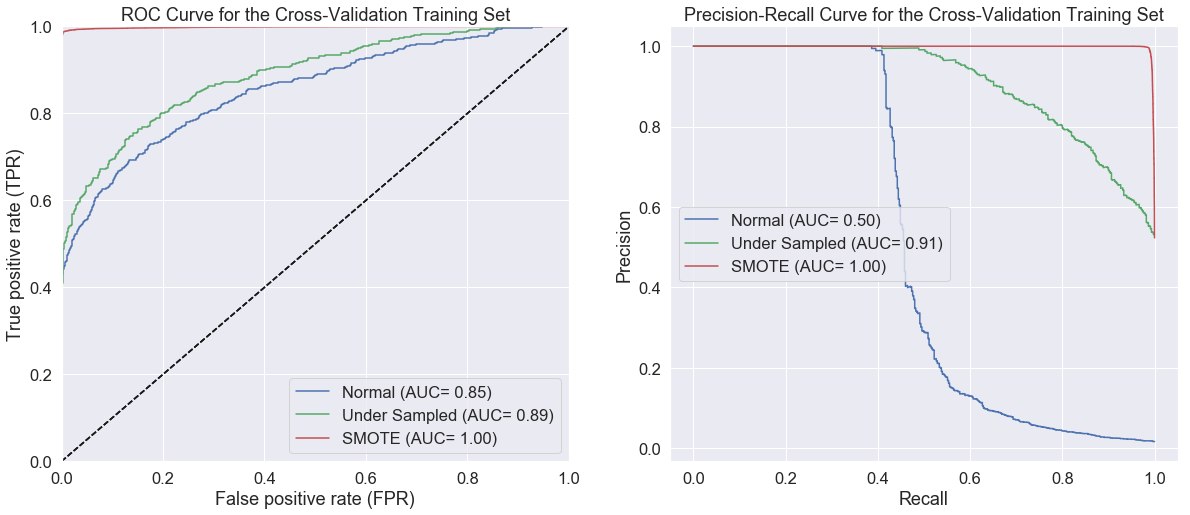

In [166]:
# Set figure and font sizes
fig = plt.figure(figsize = (20,8))
plt.rcParams.update({'font.size':20})

# Plot ROC and PR curves for normal imbalanced distribution
xgb_best = xgb.XGBClassifier(n_estimators=1000, subsample=0.8, colsample_bytree=0.8,random_state=42,
                         max_depth =3, min_child_weight=5, learning_rate =0.1,reg_alpha =0.001,
                        scale_pos_weight = class_ratio, gamma=0.0)   

Plot_ROC_Curve_and_PRC_Cross_Val(xgb_best, X_train_scale, y_train,
                       color= 'b', label = 'Normal (AUC= %0.2f)')

# Plot ROC and PR curves for Under Sampled distribution
Plot_ROC_Curve_and_PRC_Cross_Val(xgb_und, X_train_scale_und, y_train_und,
                       color= 'g', label = 'Under Sampled (AUC= %0.2f)')
                     
# Plot ROC and PR curves for SMOTE distribution
Plot_ROC_Curve_and_PRC_Cross_Val(xgb_ovsm, X_train_scale_ovsm, y_train_ovsm,
                       color= 'r', label = 'SMOTE (AUC= %0.2f)') 

- We can see that SMOTE performed extremely well on the training set. We will now use this result to trick the classifier on the imbalanced test set

# Prediction on the Imbalanced Test Set

In this section, we make our final prediction on the imbalanced dataset after training the model using the resampling techniques.

## 1. Normal Imbalanced dataset

In [167]:
xgb_best = xgb.XGBClassifier(n_estimators=1000, subsample=0.8, colsample_bytree=0.8,random_state=42,
                         max_depth =3, min_child_weight=5, learning_rate =0.1,reg_alpha =0.001,
                        scale_pos_weight = class_ratio, gamma=0.0)

Test_Prediction(xgb_best, X_train_scale, y_train, X_test_scale, y_test)

****************************************************************************
Test accuracy:  0.969493
AUROC: 0.849757
AUPRC: 0.490625
Predicted classes: [0 1]
Confusion matrix:
 [[6713  157]
 [  56   56]]
Classification report:
              precision    recall  f1-score   support

          0       0.99      0.98      0.98      6870
          1       0.26      0.50      0.34       112

avg / total       0.98      0.97      0.97      6982

****************************************************************************


## 2. Undersampled dataset

In [168]:
Test_Prediction(xgb_und, X_train_scale_und, y_train_und, X_test_scale, y_test)

****************************************************************************
Test accuracy:  0.853051
AUROC: 0.849357
AUPRC: 0.478777
Predicted classes: [0 1]
Confusion matrix:
 [[5886  984]
 [  42   70]]
Classification report:
              precision    recall  f1-score   support

          0       0.99      0.86      0.92      6870
          1       0.07      0.62      0.12       112

avg / total       0.98      0.85      0.91      6982

****************************************************************************


## 3. SMOTE dataset

In [169]:
Test_Prediction(xgb_ovsm, X_train_scale_ovsm, y_train_ovsm, X_test_scale, y_test)

****************************************************************************
Test accuracy:  0.987826
AUROC: 0.845458
AUPRC: 0.476294
Predicted classes: [0 1]
Confusion matrix:
 [[6850   20]
 [  65   47]]
Classification report:
              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6870
          1       0.70      0.42      0.53       112

avg / total       0.99      0.99      0.99      6982

****************************************************************************


- On the basis of recall, undersampling outperformed other sampling techniques

- On the basis of AUPRC, the normal imbalanced dataset outperformed other sampling techniques

- SMOTE has the highest precision, because it misclassifies a small number of true negatives

#  ROC and PR Curves on the Test Set

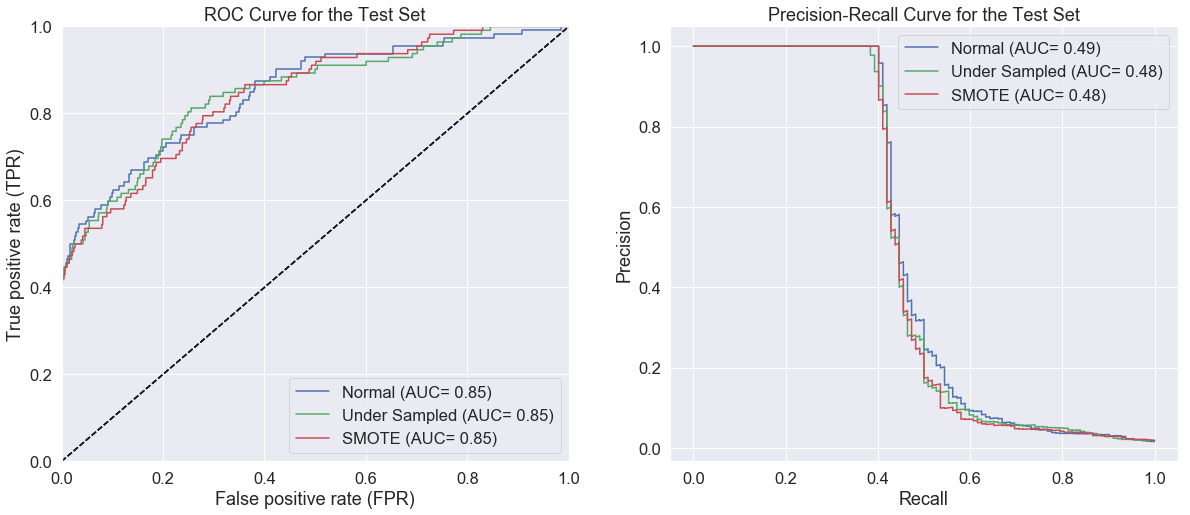

In [170]:
# Set figure and font sizes
fig = plt.figure(figsize = (20,8))
plt.rcParams.update({'font.size':20})

# Plot ROC and PR curves for normal imbalanced distribution
xgb_best = xgb.XGBClassifier(n_estimators=1000, subsample=0.8, colsample_bytree=0.8,random_state=42,
                         max_depth =3, min_child_weight=5, learning_rate =0.1,reg_alpha =0.001,
                        scale_pos_weight = class_ratio, gamma=0.0) 

Plot_ROC_Curve_and_PRC(xgb_best, X_train_scale, y_train, X_test_scale, y_test,
                       color= 'b', label = 'Normal (AUC= %0.2f)')

# Plot ROC and PR curves for Under Sampled distribution
Plot_ROC_Curve_and_PRC(xgb_und, X_train_scale_und, y_train_und, X_test_scale, y_test,
                       color= 'g', label = 'Under Sampled (AUC= %0.2f)')

# Plot ROC and PR curves for  SMOTE distribution
Plot_ROC_Curve_and_PRC(xgb_ovsm, X_train_scale_ovsm, y_train_ovsm, X_test_scale, y_test,
                       color= 'r', label = 'SMOTE (AUC= %0.2f)')

- We can see that the AUPRC of the normal imbalanced dataset is slightly higher (by 0.01\%) than undersampling and SMOTE.

# Conclusion

In conclusion, we have analysed the motor vehicle collision on public roads in Canada from 1999 to 2016. We explored and identified some of the main causes of fatal motor vehicle collision and we built a machine learning model to predict the fatal accident class, which is the minority class with only $2\%$ of the whole dataset.

From our exploratory data analysis, we found the following results:

1. The most fatal collision occured in the year 1999 and the least fatal collision occured in the year 2014.

2. Two in every 100 men involves in a fatal collision, whereas one in every 100 women involves in a fatal collision.

3. Most fatal collision are mainly caused by  teenagers between the age range 16 to 19 and they are mostly boys.

4. The vehicle model in the year 2000 & 2001 caused the most fatal collisions.

5. Most fatal collisions occur on Saturdays in the month of July and August (summer session).

6. Most fatal collisions occur when the roads are dry and clear and at no intersections.

Furthermore, we built a machine learning predictive model to classify fatal collisions from non-fatal collisions, where the former is only $2\%$ of the total observations resulting in a highly imbalanced dataset. The dataset contains over 6 million observations with numerous missing values. The missing values were delected and the resulting dataset still contains over 3 million observations. We built the predictive modeling with only $1\%$ of th total observation due to the capacity of our computer system. We found that XGBoost outperformed Random forest classifier on the training set, so we picked the former and optimized its AUPR and Recall, which were chosen as the performance measure. 

The dataset was split into $80\%$ training set and $20\%$ test set. We modeled XGBoost classifier on the imbalanced training set using cost sensitive method, undersampling, and SMOTE.  On the cross-validation training set, SMOTE outperfomed other resampling methods by a high margin. However, on the imbalanced test set we obtain the following results:

In [219]:
pd.DataFrame({'Normal':[0.85,0.49,0.50,0.26], 'Undersampling': [0.85,0.48,0.62,0.07], 
               'SMOTE': [0.85,0.48,0.42,0.70]}, index = ['AUROC', 'AUPR', 'Recall', 'Precision'])

,Normal,Undersampling,SMOTE
AUROC,0.85,0.85,0.85
AUPR,0.49,0.48,0.48
Recall,0.50,0.62,0.42
Precision,0.26,0.07,0.70


These results show that we are able to predict the fatal accidents and the model can be used to predict the risk for fatal accident in the future. However, we beleive that these results can be improved in many ways, for example by using the whole dataset, tuning XGBoost properly, or adding interaction terms.